In [1]:
import pandas as pd 
from rich import print 
import seaborn as sns 
import numpy as np 
import math 
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
from networkx.utils import np_random_state 
from networkx.algorithms import community

In [2]:
import powerlaw

In [3]:
G=nx.read_gexf('final_net.gexf')

# 3) NETWORK CHARACTERIZATION

## Basic Measures

In [4]:
#n of Nodes
G.number_of_nodes()

10184

In [5]:
#n of Edges
G.number_of_edges()

11968

In [7]:
G.is_directed()
#G is Undirected 

False

## 3.2 Degree distribution analysis ##

In [9]:
#Average Degree <k>
avg_degreeRW= 2*G.number_of_edges()/G.number_of_nodes()

In [10]:
print('Avg degree of RW is',avg_degreeRW)

Avg degree of RW is 2.350353495679497

In [11]:
maxdegreeRW=max(dict(G.degree()).values())
mindegreeRW=min(dict(G.degree()).values())

In [12]:
print('MAX degree RW is',maxdegreeRW)
print('min degree RW is',mindegreeRW)
#Max degree = 1956
#min degree = 1

MAX degree RW is 1956

min degree RW is 1

In [13]:
G.degree()

DegreeView({'290883': 1, '1471971': 1, '2052911': 5, '2827221': 1, '3688111': 1, '4254951': 1, '4615341': 1, '4937571': 1, '5404582': 1, '5516892': 1, '5749002': 1, '5849252': 1, '6266142': 2, '6691762': 11, '7078452': 1, '7703052': 1, '7777302': 2, '8007502': 1, '8052182': 1, '9063952': 1, '9147152': 1, '9731332': 1, '11025592': 1, '11076222': 1, '11486222': 1, '11567702': 1, '12512292': 1, '12610772': 5, '13301942': 1, '13525132': 1, '13748912': 1, '14118020': 1, '14132126': 2, '14152382': 1, '14214964': 1, '14218303': 1, '14314815': 1, '14410543': 1, '14430522': 1, '14446152': 1, '14449273': 2, '14465456': 1, '14491785': 1, '14496536': 13, '14519073': 2, '14522241': 1, '14535500': 1, '14542602': 1, '14568965': 1, '14615214': 1, '14719297': 1, '14761966': 1, '14804672': 1, '14808213': 2, '14828950': 1, '14834002': 1, '14843373': 2, '14932805': 1, '14944543': 1, '14986544': 1, '15021056': 1, '15029604': 2, '15055787': 1, '15060697': 1, '15074415': 1, '15085192': 1, '15090241': 1, '151

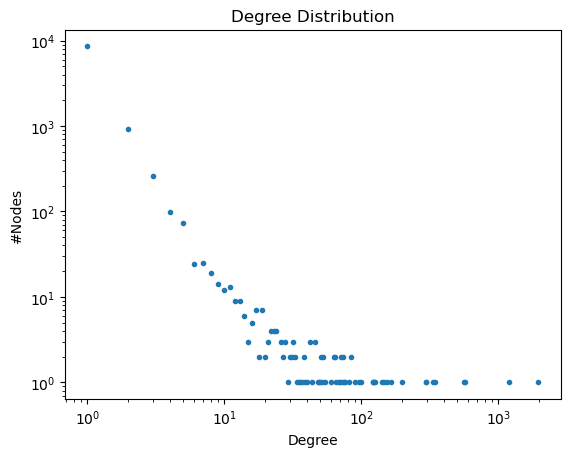

In [14]:
#Degree distribution
hist = nx.degree_histogram(G)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

## 3.3 Connected component analysis and Path analysis##

In [15]:
nx.number_connected_components(G)

1

In [16]:
# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)
#H is the largest component 

In [17]:
#n of Edges
H.number_of_edges()

11968

In [18]:
#n of Nodes
H.number_of_nodes()

10184

### Path analysis ##

In [22]:
diameterRW = nx.diameter(G)
#is the longest shortest path in the graph
print('the diameter of RW is',diameterRW)

the diameter of RW is 18

In [23]:
avg_shortestpathRW = nx.average_shortest_path_length(G)
print('the Avg shortest path of RW is',avg_shortestpathRW)

the Avg shortest path of RW is 4.972121353619957

In [24]:
print(nx.average_shortest_path_length(G))

4.972121353619957

## 3.4 Clustering Coefficient & Density analysis ##

In [25]:
#local clustering coeff
nx.clustering(G)

{'290883': 0,
 '1471971': 0,
 '2052911': 0.2,
 '2827221': 0,
 '3688111': 0,
 '4254951': 0,
 '4615341': 0,
 '4937571': 0,
 '5404582': 0,
 '5516892': 0,
 '5749002': 0,
 '5849252': 0,
 '6266142': 1.0,
 '6691762': 0,
 '7078452': 0,
 '7703052': 0,
 '7777302': 0,
 '8007502': 0,
 '8052182': 0,
 '9063952': 0,
 '9147152': 0,
 '9731332': 0,
 '11025592': 0,
 '11076222': 0,
 '11486222': 0,
 '11567702': 0,
 '12512292': 0,
 '12610772': 0.2,
 '13301942': 0,
 '13525132': 0,
 '13748912': 0,
 '14118020': 0,
 '14132126': 0,
 '14152382': 0,
 '14214964': 0,
 '14218303': 0,
 '14314815': 0,
 '14410543': 0,
 '14430522': 0,
 '14446152': 0,
 '14449273': 0,
 '14465456': 0,
 '14491785': 0,
 '14496536': 0.01282051282051282,
 '14519073': 0,
 '14522241': 0,
 '14535500': 0,
 '14542602': 0,
 '14568965': 0,
 '14615214': 0,
 '14719297': 0,
 '14761966': 0,
 '14804672': 0,
 '14808213': 0,
 '14828950': 0,
 '14834002': 0,
 '14843373': 0,
 '14932805': 0,
 '14944543': 0,
 '14986544': 0,
 '15021056': 0,
 '15029604': 0,
 '15055

In [29]:
#average clustering coefficient
avg_clustcoeffRW = nx.average_clustering(G)
#avgC = 1/NxsommCi
print('the Avg Clust Coeff of RW is',avg_clustcoeffRW)

the Avg Clust Coeff of RW is 0.038286867966346165

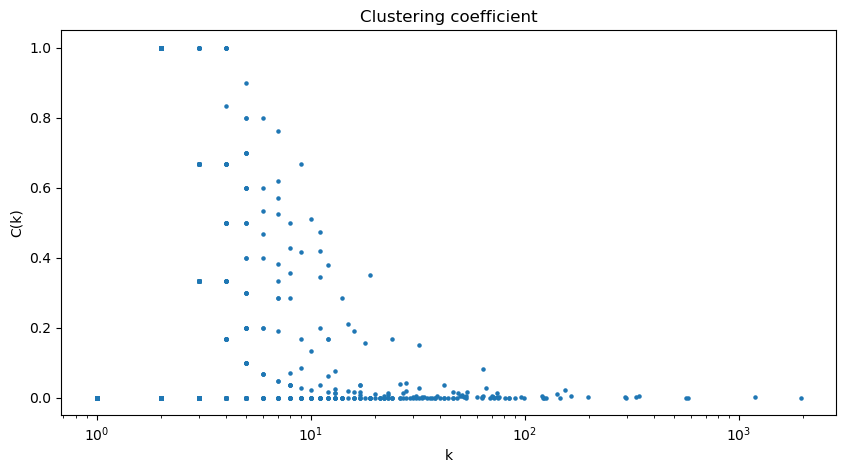

In [30]:
#distribution of clustering coeffient based on the degree k of the node
degrees = G.degree()

y = []
x = []

for degree in degrees:
    node = degree[0]
    degree = degree[1]
    local_clustering_coefficient = nx.clustering(G,node) #calculate local clustering coefficient
    y.append(local_clustering_coefficient)
    x.append(degree)

    
plt.figure(figsize=(10,5))
plt.scatter(x, y,s=5)
#plt.markersize('5')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("C(k)")
plt.title("Clustering coefficient")
plt.savefig('cluster_coefficient_distribution.pdf',format='pdf')

plt.show()
#plt.legend()
#plt.savefig('NetChar_clustering coeff distribution G.pdf')

In [31]:
#Density
densityRW = nx.density(G)
print('the Density of RW is',densityRW)

the Density of RW is 0.00023081149913380117

## 3.5 Centrality analysis ##

##### Degree Centrality 

In [32]:
degree_centr = nx.degree_centrality(G)
degree_centr

{'290883': 9.820288716488265e-05,
 '1471971': 9.820288716488265e-05,
 '2052911': 0.0004910144358244132,
 '2827221': 9.820288716488265e-05,
 '3688111': 9.820288716488265e-05,
 '4254951': 9.820288716488265e-05,
 '4615341': 9.820288716488265e-05,
 '4937571': 9.820288716488265e-05,
 '5404582': 9.820288716488265e-05,
 '5516892': 9.820288716488265e-05,
 '5749002': 9.820288716488265e-05,
 '5849252': 9.820288716488265e-05,
 '6266142': 0.0001964057743297653,
 '6691762': 0.0010802317588137092,
 '7078452': 9.820288716488265e-05,
 '7703052': 9.820288716488265e-05,
 '7777302': 0.0001964057743297653,
 '8007502': 9.820288716488265e-05,
 '8052182': 9.820288716488265e-05,
 '9063952': 9.820288716488265e-05,
 '9147152': 9.820288716488265e-05,
 '9731332': 9.820288716488265e-05,
 '11025592': 9.820288716488265e-05,
 '11076222': 9.820288716488265e-05,
 '11486222': 9.820288716488265e-05,
 '11567702': 9.820288716488265e-05,
 '12512292': 9.820288716488265e-05,
 '12610772': 0.0004910144358244132,
 '13301942': 9.

In [34]:
#Max values for Degree Centrality 
lista_degcentr = []
for v in degree_centr.values():
    lista_degcentr.append(v)
m = max(lista_degcentr)
m

0.19208484729451045

In [35]:
for v in lista_degcentr: 
    if v == m :
        lista_degcentr.remove(m) 
m = max(lista_degcentr)
m

0.11745065304919965

In [36]:
for v in lista_degcentr: 
    if v == m :
        lista_degcentr.remove(m) 
m = max(lista_degcentr)
m

0.0565648630069724

In [38]:
for k,v in degree_centr.items():
    if v == 0.19208484729451045:
        print('1° Max Degree centr ,k)

for k,v in degree_centr.items():
    if v == 0.11745065304919965:
        print('2° Max Degree centr ',k)

for k,v in degree_centr.items():
    if v == 0.0565648630069724:
        print('3° Max Degree centr ',k)
               

il 1° Max Degree centr è il nodo  27493883

il 2° Max Degree centr è il nodo  2956836471

il 3° Max Degree centr è il nodo  4018888580

##### Closeness Centrality 

In [40]:
closeness_centr = nx.closeness_centrality(G)
closeness_centr

{'290883': 0.2224576734025123,
 '1471971': 0.21648914684184792,
 '2052911': 0.23828801422754714,
 '2827221': 0.22041125541125542,
 '3688111': 0.1615067406819984,
 '4254951': 0.13387762614709053,
 '4615341': 0.2517926907670244,
 '4937571': 0.22041125541125542,
 '5404582': 0.13195542309187508,
 '5516892': 0.22041125541125542,
 '5749002': 0.22195339915865647,
 '5849252': 0.20859109344913762,
 '6266142': 0.24089801518771733,
 '6691762': 0.15132106874312717,
 '7078452': 0.13387762614709053,
 '7703052': 0.13131052624792067,
 '7777302': 0.20796487286837537,
 '8007502': 0.22041125541125542,
 '8052182': 0.2224576734025123,
 '9063952': 0.13238773759068098,
 '9147152': 0.15926864364364365,
 '9731332': 0.2224576734025123,
 '11025592': 0.1788782124475205,
 '11076222': 0.21154205704551593,
 '11486222': 0.2517926907670244,
 '11567702': 0.19277587414573197,
 '12512292': 0.15464402867209331,
 '12610772': 0.2014361449596455,
 '13301942': 0.15124914594658825,
 '13525132': 0.19352692994792656,
 '13748912'

In [41]:
#Max values for Closeness Centrality 
lista_closenesscentr = []
for v in closeness_centr.values():
    lista_closenesscentr.append(v)
m = max(lista_closenesscentr)
m

0.3365168539325843

In [42]:
for v in lista_closenesscentr: 
    if v == m :
        lista_closenesscentr.remove(m) 
m = max(lista_closenesscentr)
m

0.3077550773694391

In [43]:
for v in lista_closenesscentr: 
    if v == m :
        lista_closenesscentr.remove(m) 
m = max(lista_closenesscentr)
m

0.3014059493858221

In [45]:
for k,v in closeness_centr.items():
    if v == 0.3365168539325843:
        print('1° Max Closeness centr ',k)
        
for k,v in closeness_centr.items():
    if v == 0.3077550773694391:
        print('2° Max Closeness centr ',k)
        
for k,v in closeness_centr.items():
    if v == 0.3014059493858221:
        print('3° Max Closeness centr ',k)
        

il 1° Max Closeness è il nodo  27493883

il 2° Max Closeness è il nodo  919915692375330816

il 3° Max Closeness è il nodo  2202063265

##### Betweeness Centrality

In [47]:
betweenness_centr = nx.betweenness_centrality(G)
betweenness_centr

{'290883': 0.0,
 '1471971': 0.0,
 '2052911': 9.495842676407755e-05,
 '2827221': 0.0,
 '3688111': 0.0,
 '4254951': 0.0,
 '4615341': 0.0,
 '4937571': 0.0,
 '5404582': 0.0,
 '5516892': 0.0,
 '5749002': 0.0,
 '5849252': 0.0,
 '6266142': 0.0,
 '6691762': 0.0019631897154205324,
 '7078452': 0.0,
 '7703052': 0.0,
 '7777302': 0.0001581609269835421,
 '8007502': 0.0,
 '8052182': 0.0,
 '9063952': 0.0,
 '9147152': 0.0,
 '9731332': 0.0,
 '11025592': 0.0,
 '11076222': 0.0,
 '11486222': 0.0,
 '11567702': 0.0,
 '12512292': 0.0,
 '12610772': 0.0004213958804664013,
 '13301942': 0.0,
 '13525132': 0.0,
 '13748912': 0.0,
 '14118020': 0.0,
 '14132126': 0.00021788144691674166,
 '14152382': 0.0,
 '14214964': 0.0,
 '14218303': 0.0,
 '14314815': 0.0,
 '14410543': 0.0,
 '14430522': 0.0,
 '14446152': 0.0,
 '14449273': 0.00038468546175520624,
 '14465456': 0.0,
 '14491785': 0.0,
 '14496536': 0.0012264214354990952,
 '14519073': 0.0001964057743297653,
 '14522241': 0.0,
 '14535500': 0.0,
 '14542602': 0.0,
 '14568965': 

In [48]:
#Max values for Betweeness 
lista_betweennesscentr = []
for v in betweenness_centr.values():
    lista_betweennesscentr.append(v)
m = max(lista_betweennesscentr)
m

0.44578357399624297

In [50]:
for v in lista_betweennesscentr: 
    if v == m :
        lista_betweennesscentr.remove(m) 
m = max(lista_betweennesscentr)
m

0.2131705400806046

In [52]:
for v in lista_betweennesscentr: 
    if v == m :
        lista_betweennesscentr.remove(m) 
m = max(lista_betweennesscentr)
m

0.2052659423420334

In [55]:
for k,v in betweenness_centr.items():
    if v == 0.44578357399624297:
        print('1° Max Betweenness centr ',k)
        
for k,v in betweenness_centr.items():
    if v == 0.2131705400806046:
        print('2° Max Betweenness centr ',k)
        
for k,v in betweenness_centr.items():
    if v == 0.2052659423420334:
        print('3° Max Betweenness centr ',k)
        

il 1° Max Betweenness è il nodo  27493883

il 2° Max Betweenness è il nodo  2453069245

il 3° Max Betweenness è il nodo  2956836471

##### Harmonic Centrality

In [57]:
harmonic_centr = nx.harmonic_centrality(G)
harmonic_centr

{'815708250217840640': 2687.442696192694,
 '394717596': 2445.700235875232,
 '2753704449': 2557.893795093766,
 '801935370942316545': 1939.9076673328223,
 '1367520034839404544': 1399.524075924012,
 '359092707': 2306.3776556776647,
 '2740147945': 1626.3379148629492,
 '2573480784': 3177.867604617661,
 '4822699173': 2938.9945887445724,
 '1246299870580936704': 2400.827616827623,
 '932663203': 1896.6338023089786,
 '721706763813138432': 2313.631585081597,
 '1079429091546316800': 2246.0609501609874,
 '1304562578438451203': 2557.8937950937657,
 '1173506442491518977': 1880.1081390832517,
 '27677391': 2938.9945887445724,
 '389555799': 1896.6338023089786,
 '1092439004': 2938.9945887445724,
 '4765848672': 2938.9945887445724,
 '942447002': 2938.9945887445724,
 '1310707562598338561': 2445.700235875232,
 '2288843750': 2938.9945887445724,
 '247720567': 2557.8937950937657,
 '1440667905222320128': 2557.8937950937657,
 '105189594': 2557.8937950937657,
 '1729758474': 2391.825937950953,
 '222753306': 2255.77

In [58]:
#Max values for Harmonic Centrality
lista_harmoniccentr = []
for v in harmonic_centr.values():
    lista_harmoniccentr.append(v)
m = max(lista_harmoniccentr)
m

4580.674783549814

In [59]:
for v in lista_harmoniccentr: 
    if v == m :
        lista_harmoniccentr.remove(m)
m = max(lista_harmoniccentr)
m

3744.74898989909

In [60]:
for v in lista_harmoniccentr: 
    if v == m :
        lista_harmoniccentr.remove(m)
m = max(lista_harmoniccentr)
m

3713.731890331971

In [63]:
for k,v in harmonic_centr.items():
    if v == 4580.674783549814:
        print('1° Max Harmonic Centr ',k)
        
for k,v in harmonic_centr.items():
    if v == 3744.74898989909:
        print('2° Max Harmonic Centr ',k)
        
for k,v in harmonic_centr.items():
    if v == 3713.731890331971:
        print('3° Max Harmonic Centr ',k)
        

il 1° Max HarmonicCentr è il nodo  27493883

il 2° Max HarmonicCentr è il nodo  2956836471

il 3° Max HarmonicCentr è il nodo  2202063265

##### Page Rank

In [64]:
pagerank_centr = nx.pagerank(G)
pagerank_centr

{'290883': 4.5437423818097003e-05,
 '1471971': 4.940059012949059e-05,
 '2052911': 0.00013487331532834653,
 '2827221': 4.974232535317275e-05,
 '3688111': 5.2142287007014004e-05,
 '4254951': 5.366620681499014e-05,
 '4615341': 4.890618736280352e-05,
 '4937571': 4.974232535317275e-05,
 '5404582': 5.2417412437707206e-05,
 '5516892': 4.974232535317275e-05,
 '5749002': 4.7510229678267674e-05,
 '5849252': 4.2948711620318996e-05,
 '6266142': 6.769309717485263e-05,
 '6691762': 0.0005243336711437126,
 '7078452': 5.366620681499014e-05,
 '7703052': 5.712852697893742e-05,
 '7777302': 7.820632812526889e-05,
 '8007502': 4.974232535317275e-05,
 '8052182': 4.5437423818097003e-05,
 '9063952': 5.36842002179685e-05,
 '9147152': 5.2438495700116955e-05,
 '9731332': 4.5437423818097003e-05,
 '11025592': 4.6459382941047663e-05,
 '11076222': 4.61812148620732e-05,
 '11486222': 4.890618736280352e-05,
 '11567702': 4.7670681751473095e-05,
 '12512292': 4.55681633653309e-05,
 '12610772': 0.0001896210218869983,
 '13301

In [65]:
#Massimi valori della PageRank 
lista_pagerankcentr = []
for v in pagerank_centr.values():
    lista_pagerankcentr.append(v)
m = max(lista_pagerankcentr)
m

0.07966884424535862

In [66]:
for v in lista_pagerankcentr: 
    if v == m :
        lista_pagerankcentr.remove(m) 
m = max(lista_pagerankcentr)
m

0.04356144748651637

In [67]:
for v in lista_pagerankcentr: 
    if v == m :
        lista_pagerankcentr.remove(m)
m = max(lista_pagerankcentr)
m

0.024067341080420062

In [69]:
for k,v in pagerank_centr.items():
    if v == 0.07966884424535862:
        print('1° Max PageRank centr ',k)
        
for k,v in pagerank_centr.items():
    if v == 0.04356144748651637:
        print('2° Max PageRank centr ',k)
        
for k,v in pagerank_centr.items():
    if v == 0.024067341080420062:
        print('3° Max PageRank centr ',k)
        

il 1° Max PageRank è il nodo  27493883

il 2° Max PageRank è il nodo  2956836471

il 3° Max PageRank è il nodo  4018888580

##### Assortativity

In [70]:
#calculate degree assortativity coefficient
r = nx.degree_assortativity_coefficient(G)
print('Degree Assortativity Coefficient r is',r)

Degree Assortativity Coefficient r is -0.2379452424744904

In [72]:
#nodes correlation through assortativity 

In [72]:
knn = nx.k_nearest_neighbors(G)
knn = dict(sorted(knn.items()))

C:\Users\Giulia\AppData\Local\Temp\ipykernel_10032\3471240506.py:1: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  knn = nx.k_nearest_neighbors(G) #calculate the average nearest neighbor degree of nodes with degree k.


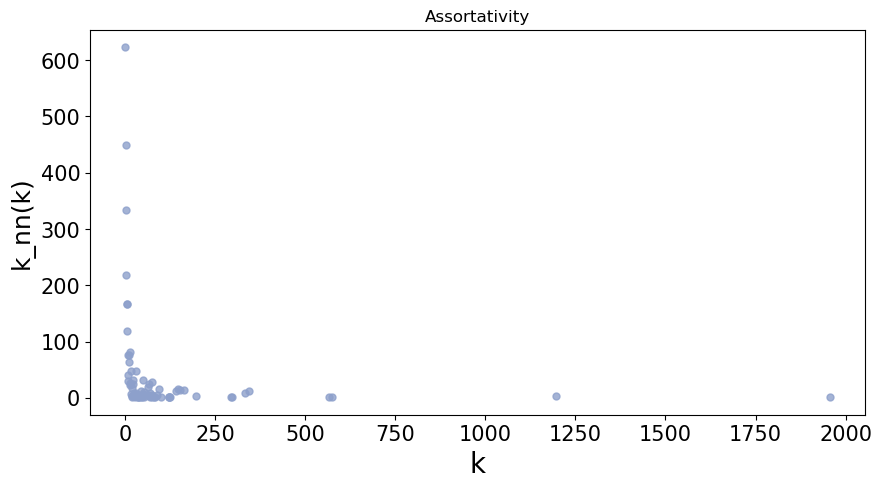

In [73]:
plt.figure(figsize=(10,5))

plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8, color = "#8DA0CB")
plt.xlabel("k", fontsize=20)
plt.ylabel("k_nn(k)",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Assortativity")
plt.show()
#plt.legend()
#plt.savefig('NetChar_Assortativity G.pdf')

##  Synthethic graphs ##

###  Erdos-Renyi model ###

In [78]:
#ER (random graphs)
#p=0.0025, N=11968
er = nx.erdos_renyi_graph(10184,0.000225)

In [79]:
#n of Nodes e n of Links
n_nodesER = er.number_of_nodes()
n_linksER = er.number_of_edges()

In [80]:
#n of Edges
n_linksER

11727

In [82]:
er.number_of_nodes()
er.number_of_edges()
print('N of nodes ER is',er.number_of_nodes())
print('N of links ER is',er.number_of_edges())

N of nodes ER is 10184

N of links ER is 11727

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


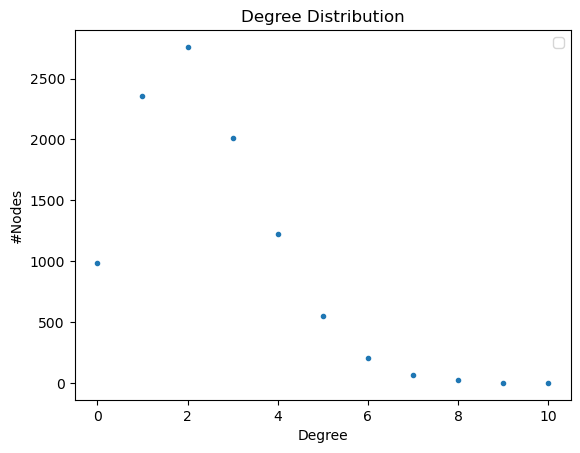

In [83]:
#ER degree distribution
hist = nx.degree_histogram(er)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
#plt.show()
plt.legend()
plt.savefig('NetChar_Degree distribution ER.pdf')

In [84]:
#avg degree, Max degree, min degree di ER

In [85]:
#Average Degree <k> of ER
avg_degreeER = sum(dict(er.degree()).values())/float(len(er))
print('the Avg degree of ER is',avg_degreeER)

the Avg degree of ER is 2.3030243519245874

In [86]:
maxdegreeER=max(dict(er.degree()).values())
mindegreeER=min(dict(er.degree()).values())

In [87]:
print('Max degree of ER is',maxdegreeER)
print('min degree of ER is',mindegreeER)

Max degree of ER is 10

min degree of ER is 0

In [95]:
nx.number_connected_components(er)
#numero di connected components in ER

1136

In [96]:
# largest connected component
componentsER = nx.connected_components(er)
largest_componentER = max(componentsER, key=len)
H_er = er.subgraph(largest_componentER)
#H_er is the largest component of ER

In [97]:
n_nodes_H_er = H_er.number_of_nodes()
n_links_H_er = H_er.number_of_edges()
print('N of nodes H_er is',H_er.number_of_nodes())
print('N of links H_er is',H_er.number_of_edges())

N of nodes H_er is 8835

N of links H_er is 11513

In [100]:
diameter_H_er = nx.diameter(H_er)
#is the longest shortest path in the graph
print('the diameter of H_er is',diameter_H_er)

the diameter of H_er is 26

In [101]:
#Avg shortest path
avg_shortestpath_H_er = nx.average_shortest_path_length(H_er)
print('the Avg shortest path of H_er is',avg_shortestpath_H_er)

the Avg shortest path of H_er is 10.690940684362612

In [103]:
#average clustering coefficient
avg_clustcoeffER = nx.average_clustering(er)
print('the Avg Clust Coeff of ER is',avg_clustcoeffER)

the Avg Clust Coeff of ER is 0.00013092432573972245

In [104]:
densityER = nx.density(er)
print('the Density of ER is',densityER)

the Density of ER is 0.00022616364057002726

###  Barabasi-Albert model ###

In [110]:
m = 1  
ba = nx.barabasi_albert_graph(10184, m)

In [111]:
#n of Nodes e n of Links
n_nodesBA = ba.number_of_nodes()
n_linksBA = ba.number_of_edges()

In [112]:
#n of Edges
n_linksBA

10183

In [115]:
#n of Nodes e n of Links
ba.number_of_nodes()
ba.number_of_edges()

print('N of nodes BA is',ba.number_of_nodes())
print('N of links BA is',ba.number_of_edges())

N of nodes BA is 10184

N of links BA is 10183

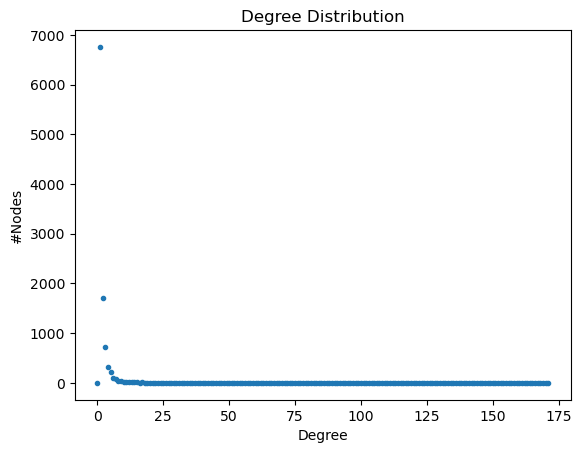

In [116]:
#BA degree distribution
hist = nx.degree_histogram(ba)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()
#plt.legend()
#plt.savefig('NetChar_Degree distribution BA.pdf')

In [117]:
#Average Degree <k> of BA
avg_degreeBA = sum(dict(ba.degree()).values())/float(len(ba))
print('the Avg degree BA is',avg_degreeBA)

the Avg degree BA is 1.9998036135113904

In [118]:
maxdegreeBA=max(dict(ba.degree()).values())
mindegreeBA=min(dict(ba.degree()).values())

In [119]:
print('Max degree of BA is',maxdegreeBA)
print('min degree of BA is',mindegreeBA)

Max degree of BA is 171

min degree of BA is 1

In [121]:
nx.number_connected_components(ba)

1

In [123]:
#Avg shortest path
avg_shortestpathBA = nx.average_shortest_path_length(ba)
print('the Avg shortest path of BA is',avg_shortestpathBA)

the Avg shortest path of BA is 8.822541847891365

In [124]:
diameterBA = nx.diameter(ba)
print('the diameter of BA is',diameterBA)

the diameter of BA is 25

In [126]:
#average clustering coefficient
avg_clustcoeffBA = nx.average_clustering(ba)
print('the Avg Clust Coeff of BA is',avg_clustcoeffBA)

the Avg Clust Coeff of BA is 0.0

In [128]:
densityBA = nx.density(ba)
print('the Density of BA is',densityBA)

the Density of BA is 0.00019638648860958367

### Watts-Strogatz model ###

In [132]:
# Watts-Strogatz model
ws = nx.watts_strogatz_graph(10184, k=3, p=0.05)

In [133]:
#n of Nodes e n of Links
n_nodesWS = ws.number_of_nodes()
n_linksWS = ws.number_of_edges()

In [134]:
#n of Edges
ws.number_of_edges()

10184

In [135]:
#n of Nodes e n of Links
ws.number_of_nodes()
ws.number_of_edges()

print('N of nodes WS is',ws.number_of_nodes())
print('N of links WS is',ws.number_of_edges())

N of nodes WS is 10184

N of links WS is 10184

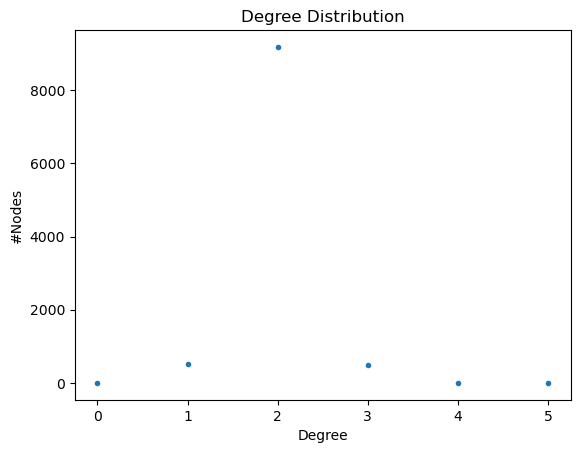

In [136]:
#WS degree distribution
hist = nx.degree_histogram(ws)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()
#plt.legend()
#plt.savefig('NetChar_Degree distribution WS.pdf')

In [137]:
#Average Degree <k> of WS
avg_degreeWS = sum(dict(ws.degree()).values())/float(len(ws))
print('the Avg degree WS is',avg_degreeWS)

the Avg degree WS is 2.0

In [138]:
maxdegreeWS=max(dict(ws.degree()).values())
mindegreeWS=min(dict(ws.degree()).values())

In [139]:
print('Max degree of WS is',maxdegreeWS)
print('min degree of WS is',mindegreeWS)

Max degree of WS is 5

min degree of WS is 1

In [145]:
nx.number_connected_components(ws)

2

In [146]:
# largest connected component
componentsWS = nx.connected_components(ws)
largest_componentWS = max(componentsWS, key=len)
H_ws = ws.subgraph(largest_componentWS)
#H_ws is the largest component of WS

In [147]:
n_nodes_H_ws = H_ws.number_of_nodes()
n_links_H_ws = H_ws.number_of_edges()
print('N of nodes H_ws is',H_ws.number_of_nodes())
print('N of links H_ws is',H_ws.number_of_edges())

N of nodes H_ws is 10112

N of links H_ws is 10112

In [150]:
diameter_H_ws = nx.diameter(H_ws)
print('the diameter of H_ws is',diameter_H_ws)

the diameter of H_ws is 955

In [151]:
#Avg shortest path
avg_shortestpath_H_ws = nx.average_shortest_path_length(H_ws)
print('the Avg shortest path of H_ws is',avg_shortestpath_H_ws)

the Avg shortest path of H_ws is 351.0495036346553

In [153]:
#average clustering coefficient
avg_clustcoeffWS = nx.average_clustering(ws)
print('the Avg Clust Coeff of WS is',avg_clustcoeffWS)

the Avg Clust Coeff of WS is 0.0

In [154]:
densityWS = nx.density(ws)
print('the Density of WS is',densityWS)

the Density of WS is 0.0001964057743297653

### degree distributions comparison (RW,BA,ER,WS) ###

In [155]:
def degree_dist_plot(graphs):
    fig = plt.figure(figsize=(16,8))
    labels = []
    for i in graphs:
        if i[0].is_directed():
            degrees = i[0].in_degree() # dictionary node:degree
        else:
            degrees = i[0].degree() # dictionary node:degree
        values = sorted(set([v for k, v in degrees]))
        hist = [[v for k, v in degrees].count(x) for x in values]
        labels.append(i[1])
        if(i[1] == "Real World"):
            plt.loglog(values, hist, 'o-') # in-degree
        else:
            plt.loglog(values, hist, 'o') # in-degree
    fontsize = 15
    
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Degree", fontsize=fontsize)
    plt.ylabel("Number of nodes", fontsize=fontsize)
    plt.title("Degree Distribution", fontsize=fontsize)
    plt.legend(labels, fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xlim([0, 2*10**2])
    
    plt.show()

C:\Users\Giulia\AppData\Local\Temp\ipykernel_10032\757876449.py:24: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 2*10**2])


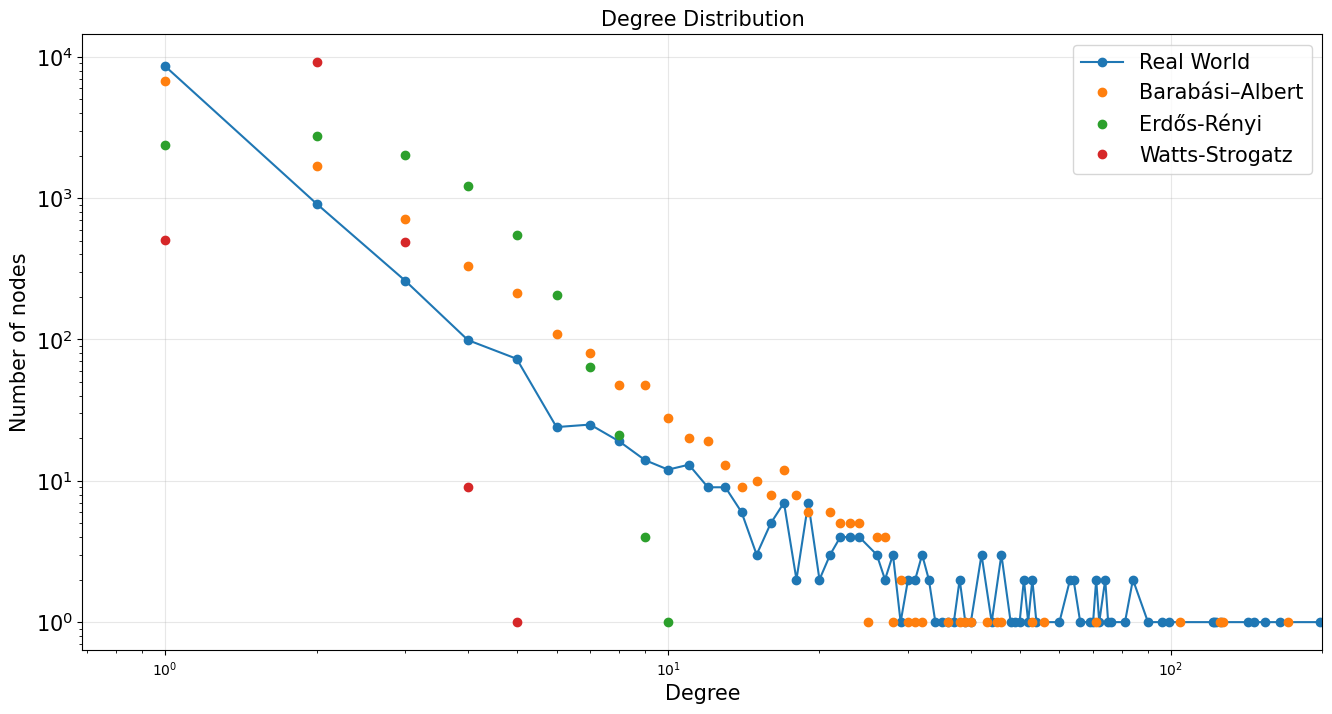

In [156]:
graphs = [(G, "Real World"), (ba, "Barabási–Albert"), (er, "Erdős-Rényi"),(ws,"Watts-Strogatz")]
degree_dist_plot(graphs)
#plt.legend()
#plt.savefig('NetChar_Degree distribution RW,ER,BA and WS.pdf')